# House Price Prediction with Deep Neural Networks (DNN)

Welcome to the "House Price Prediction with Deep Neural Networks" notebook! In this notebook, we will explore the exciting world of machine learning and deep learning to build a model that can predict house prices based on various features and attributes of houses.

## Project Overview

Predicting house prices is a common and essential task in the real estate industry. Whether you're a home buyer looking for a fair deal or a seller trying to determine the right listing price, accurate price predictions are crucial. In this project, we will leverage the power of deep neural networks to create a predictive model that can estimate house prices with high accuracy.

## Dataset

We will be using a dataset containing various features such as the number of bedrooms, square footage, neighborhood information, and more. This dataset will serve as the foundation for our machine learning model's training and evaluation.

## Key Steps

1. Data Preprocessing: We'll start by loading and exploring the dataset. We'll handle missing values, encode categorical variables, and perform any necessary data transformations.

2. Model Building: The heart of this project lies in creating a Deep Neural Network (DNN) architecture. We'll design and train the neural network using TensorFlow or PyTorch, depending on your preference.

3. Model Evaluation: We will evaluate the model's performance using appropriate metrics, cross-validation, and visualization techniques to ensure it's making accurate predictions.

4. Prediction and Deployment: Once we have a well-performing model, we can use it to predict house prices. Depending on your project goals, we may also explore deploying the model for real-world usage.

## Let's Get Started!

Now that we have a clear roadmap, let's dive into the exciting world of house price prediction using deep learning. Feel free to follow along, ask questions, and experiment with the code to gain a deeper understanding of the process.

Let's begin by loading our dataset and exploring the data!


In [11]:
import pandas as pd

# load the dataset
df = pd.read_csv('housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [12]:
df.dropna()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Data Preprocessing: Scaling Numerical Features

Before we dive into building our house price prediction model using deep neural networks, it's crucial to preprocess our data appropriately. One essential preprocessing step is feature scaling, which ensures that numerical features have a consistent scale and can be effectively used in our machine learning model.

In this code block, we are using the `MinMaxScaler` from the `scikit-learn` library to scale specific numerical features in our dataset. These features include 'area', 'bedrooms', 'bathrooms', 'stories', and 'parking'. Scaling these features is essential because it can help our model converge faster during training and improve overall model performance.

The `MinMaxScaler` scales the features to a specific range (typically between 0 and 1) by linearly transforming the original values. This ensures that all numerical features contribute equally to the model's predictions.

Let's proceed with this data preprocessing step to ensure that our data is in the best possible shape for training our deep neural network.


In [13]:
from sklearn.preprocessing import MinMaxScaler
for col in ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
  mms = MinMaxScaler()
  df[col] = mms.fit_transform(df[[col]])

In [14]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,12250000,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,12250000,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,12215000,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,11410000,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.092784,0.2,0.000000,0.000000,yes,no,yes,no,no,0.666667,no,unfurnished
541,1767150,0.051546,0.4,0.000000,0.000000,no,no,no,no,no,0.000000,no,semi-furnished
542,1750000,0.135395,0.2,0.000000,0.000000,yes,no,no,no,no,0.000000,no,unfurnished
543,1750000,0.086598,0.4,0.000000,0.000000,no,no,no,no,no,0.000000,no,furnished


# Data Preprocessing: Label Encoding

In this section, we will perform label encoding on categorical features in our dataset. Label encoding is a technique used to convert categorical data into numerical format, making it suitable for machine learning models. We will apply label encoding to the following categorical columns: 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', and 'furnishingstatus'.

## What is Label Encoding?

Label encoding is a method of converting categorical data into numerical values. Each unique category in a column is assigned a unique integer, allowing machine learning algorithms to work with categorical data effectively. It is important to note that label encoding is suitable for ordinal categorical data, where the order of categories matters. For nominal categorical data, other encoding techniques like one-hot encoding are often preferred.

Now, let's proceed with the label encoding for our dataset. The code cell below will demonstrate how to apply label encoding using the scikit-learn library.


In [15]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
  df[col] = lbl.fit_transform(df[[col]])

/home/ubuntu/environments/hpepyspark/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/environments/hpepyspark/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/environments/hpepyspark/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ubuntu/environments/hpepyspark/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A 

In [29]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,0
1,12250000,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,0
2,12250000,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,1
3,12215000,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,0
4,11410000,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.092784,0.2,0.000000,0.000000,1,0,1,0,0,0.666667,0,2
541,1767150,0.051546,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,1
542,1750000,0.135395,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,2
543,1750000,0.086598,0.4,0.000000,0.000000,0,0,0,0,0,0.000000,0,0


In [39]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.30, random_state=0)

In [40]:
X_train,y_train = df_train[['area','bedrooms','bathrooms','stories',
    'mainroad','guestroom','basement','hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].values, df_train['price'].values

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Creating a Keras Model for Predicting Boston Housing Prices

In the following code cell, we will create a Keras model for predicting Boston Housing Prices using a deep neural network (DNN). The model architecture consists of multiple layers, including input, hidden, and output layers.

### Model Architecture

- **Input Layer:** The first layer of our neural network takes the features of the dataset as input. In this case, it has an input dimension that matches the number of features in our training data.

- **Hidden Layers:** We have added two hidden layers with 100 neurons each. These layers use the ReLU (Rectified Linear Unit) activation function, which is commonly used in deep learning models.

- **Output Layer:** The output layer has a single neuron and uses a linear activation function. This is suitable for regression tasks, such as predicting house prices, as it allows the model to output continuous values.

### Model Naming

We've named our model "BostonHousingPrices" for clarity and identification purposes.

You can run the code cell below to create the Keras model and add the specified layers. Afterward, we will compile and train the model to make predictions on the Boston Housing Prices dataset.


In [42]:
# create keras model and add the layers
model = Sequential(name='BostonHousingPrices')
model.add(Dense(100, input_dim = X_train.shape[1], activation='relu', name='Hidden-1'))
model.add(Dense(100, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='linear', name='Output'))
     

In [43]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [44]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.3)

Epoch 1/100
9/9 [==============================] - 0s 12ms/step - loss: 26436744249344.0000 - mae: 4773944.5000 - val_loss: 25775365423104.0000 - val_mae: 4754640.5000
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 26436721180672.0000 - mae: 4773942.0000 - val_loss: 25775338160128.0000 - val_mae: 4754638.0000
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 26436683431936.0000 - mae: 4773937.5000 - val_loss: 25775292022784.0000 - val_mae: 4754633.5000
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 26436633100288.0000 - mae: 4773933.0000 - val_loss: 25775231205376.0000 - val_mae: 4754627.5000
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 26436568088576.0000 - mae: 4773926.5000 - val_loss: 25775153610752.0000 - val_mae: 4754619.0000
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 26436482105344.0000 - mae: 4773918.0000 - val_loss: 25775050850304.0000 - val_mae: 4754609.50

Epoch 50/100
9/9 [==============================] - 0s 3ms/step - loss: 26394534871040.0000 - mae: 4769772.0000 - val_loss: 25730880634880.0000 - val_mae: 4750227.5000
Epoch 51/100
9/9 [==============================] - 0s 3ms/step - loss: 26392284626944.0000 - mae: 4769545.0000 - val_loss: 25728521338880.0000 - val_mae: 4749993.0000
Epoch 52/100
9/9 [==============================] - 0s 3ms/step - loss: 26389921136640.0000 - mae: 4769315.0000 - val_loss: 25726008950784.0000 - val_mae: 4749744.0000
Epoch 53/100
9/9 [==============================] - 0s 3ms/step - loss: 26387467468800.0000 - mae: 4769070.5000 - val_loss: 25723490271232.0000 - val_mae: 4749494.0000
Epoch 54/100
9/9 [==============================] - 0s 3ms/step - loss: 26384965566464.0000 - mae: 4768823.0000 - val_loss: 25720862539776.0000 - val_mae: 4749233.5000
Epoch 55/100
9/9 [==============================] - 0s 3ms/step - loss: 26382354612224.0000 - mae: 4768566.5000 - val_loss: 25718148825088.0000 - val_mae: 47489

Epoch 99/100
9/9 [==============================] - 0s 3ms/step - loss: 26169640484864.0000 - mae: 4747483.0000 - val_loss: 25497639583744.0000 - val_mae: 4727034.5000
Epoch 100/100
9/9 [==============================] - 0s 3ms/step - loss: 26162042503168.0000 - mae: 4746736.5000 - val_loss: 25489882218496.0000 - val_mae: 4726261.0000


In [45]:
import matplotlib.pyplot as plt

## Visualizing Training and Validation Loss

Before we proceed further, let's take a moment to visualize the training and validation loss curves. These curves provide valuable insights into how our deep neural network is learning from the data.

In the code cell below, we will generate a plot that displays the training loss and validation loss over the epochs of our model training. This plot will help us assess whether our model is improving during training and if there are signs of overfitting or underfitting.

Let's go ahead and plot the loss curves:


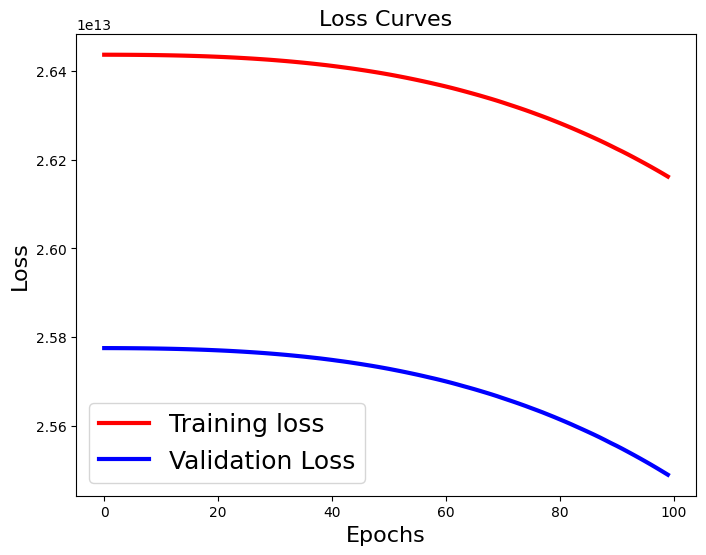

In [46]:
plt.figure(figsize=[8, 6])
plt.plot(hist.history['loss'], 'r', linewidth=3.0)
plt.plot(hist.history['val_loss'], 'b', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)
plt.show()
     

## Visualizing Model Training Progress

In machine learning, it's crucial to monitor how your model is learning and whether it's improving over time. One common way to assess this is by visualizing training metrics. In this code cell, we will plot the Mean Absolute Error (MAE) during the training process of our deep neural network.

### What is Mean Absolute Error (MAE)?

MAE is a metric that measures the average absolute difference between the predicted values and the actual values. In the context of house price prediction, it tells us how far, on average, our model's predictions are from the actual sale prices. A lower MAE indicates better prediction accuracy.

### Understanding the Plot

- The red line represents the MAE on the training dataset.
- The blue line represents the MAE on the validation dataset.
- The x-axis shows the number of epochs, which are iterations through the entire training dataset.
- The y-axis shows the MAE value.

By observing this plot, we can gain insights into how well our model is learning and whether it might be overfitting or underfitting. Ideally, we want to see the MAE decreasing for both the training and validation sets as training progresses.

Let's run the code cell below to visualize the training progress and better understand our model's performance.


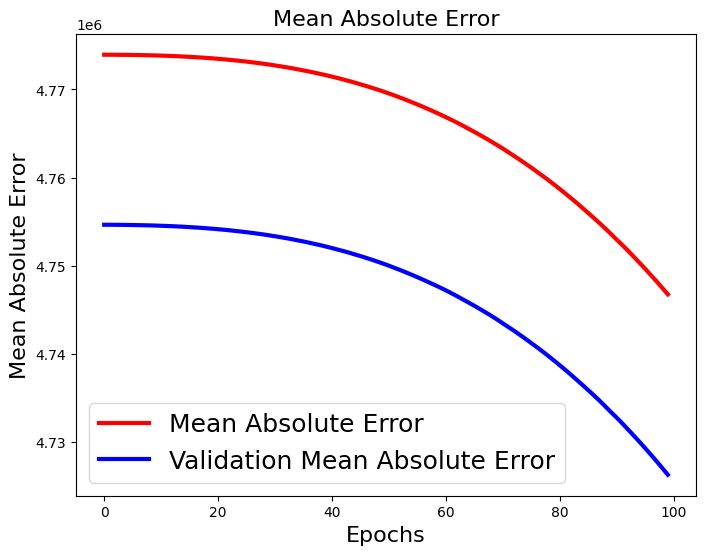

In [47]:
plt.figure(figsize=[8, 6])
plt.plot(hist.history['mae'], 'r', linewidth=3.0)
plt.plot(hist.history['val_mae'], 'b', linewidth=3.0)
plt.legend(['Mean Absolute Error', 'Validation Mean Absolute Error'], fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Mean Absolute Error', fontsize=16)
plt.title('Mean Absolute Error', fontsize=16)
plt.show()

In [48]:
X_test,y_test = df_test[['area','bedrooms','bathrooms','stories',
    'mainroad','guestroom','basement','hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].values, df_test['price'].values

# Evaluating the Model

In this section, we will evaluate the performance of our house price prediction model using the `evaluate` method. The `evaluate` method allows us to assess how well our trained model generalizes to new, unseen data.

## Model Evaluation

We will use the following code to evaluate our model on the test dataset:


In [49]:
# testing the model with using evaluate method
test_result = model.evaluate(X_test, y_test)
for i in range(len(test_result)):
    print(f'{model.metrics_names[i]} ---> {test_result[i]}')

6/6 [==============================] - 0s 969us/step - loss: 25878595633152.0000 - mae: 4735777.0000
loss ---> 25878595633152.0
mae ---> 4735777.0
